In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
from mpltools import style
style.use('ggplot')

One of Gosset’s analyses focused on malt extract, which was measured in “degrees saccharine” per barrel of 168 lbs. malt. At the time, an extract in the neighborhood of 133° gave the targeted level of alcohol content for Guinness’s beer. A higher extract affected the life of the beer, and also the alcohol content which in turn affected the excise tax paid on alcoholic beverages. 

In Gosset’s view, +/-0.5° was a difference or error in malt extract level which Guinness and its customers could swallow, and he determined that "in order to get the accuracy we require we must take the mean of at least four determinations.”

In [3]:
# Define our null hypothesis along with properties of our sample
H0_mu0 = 133
degrees_saccharine = np.array([133.72, 137.02, 140.88, 135.45])
n = len(degrees_saccharine)

# Calculate sample average and variance, and D.O.F.
xbar = np.mean(degrees_saccharine)
s2 = np.var(degrees_saccharine, ddof = 1)
df = n - 1

# Because we elect a two tailed test, we double the value of 
#    the CDF at the observed average
print(2 * (1 - stats.t.cdf((xbar - H0_mu0)/np.sqrt(s2/n), df = df)))

# We verify the folks at scipy can do math too...
stats.ttest_1samp(degrees_saccharine, H0_mu0)

0.0903500656754


Ttest_1sampResult(statistic=2.4664308272896882, pvalue=0.090350065675395053)

<h2>Confidence Intervals</h2>
<p>
Recall: <br/>
$P(\bar{X} - 1.96*\frac{\sigma}{\sqrt{n}} < \mu < \bar{X} + 1.96*\frac{\sigma}{\sqrt{n}}) = .95$ <br/>
iff <br/>
$X_i \approx N(\mu, \sigma)$<br/>
More generally, <br/>
$P(\bar{X} - t^{\alpha/2}_{n-1}*\frac{\sigma}{\sqrt{n}} < \mu < \bar{X} + t^{\alpha/2}_{n-1}*\frac{\sigma}{\sqrt{n}}) = .95$<br/>
<br/>
The connection to hypothesis testing is that a 100%*(1-$\alpha$) c.i.:<br/>
- that does not contain $\mu_0$ rejects the null hypothesis in a two tailed test. <br/>
- that does contain $\mu_0$ fails to reject the null hypothesis in a two tailed test.
</p>

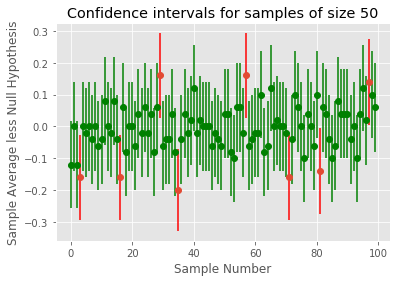

In [3]:
mu_0 = .5
n = 1000
votes = np.random.binomial(1, mu_0, n)


samples = []
size = 50
for i in range(100):
    sample = np.random.choice(votes, size=size, replace=False)
    s_m = np.mean(sample)-mu_0
    s_e = 1.96*np.sqrt(np.var(sample, ddof = 1)/size)
    s_c = 'green' if s_m+s_e>0 and s_m-s_e<0 else 'red'
    samples.append([i, s_m, s_e, s_c])

    
samples0 = np.array([x for x in samples if x[3]=='green'])
samples1 = np.array([x for x in samples if x[3]=='red'])

fig, ax = plt.subplots(1, 1)
ax.errorbar(samples0[:,0].astype('float'), samples0[:,1].astype('float'), yerr=samples0[:,2].astype('float'), fmt='o', color='green', ecolor='green')
ax.errorbar(samples1[:,0].astype('float'), samples1[:,1].astype('float'), yerr=samples1[:,2].astype('float'), fmt='o', ecolor='red')
ax.set_title("Confidence intervals for samples of size {}".format(size))
ax.set_ylabel("Sample Average less Null Hypothesis")
ax.set_xlabel("Sample Number")
ax.legend(loc='upper right')
plt.show()

<h2>Z-score</h2>
<p>
Z-score's can be used in instances where sample sizes are sufficiently large.
</p>

In [4]:
# Get data which we know has a mean of .3
n = 100
for o in np.linspace(0, .5, 6):
    data = np.random.normal(o, 1, n)
    s_m = np.mean(data)
    s_v = np.var(data)
    # What is the z-score if null hypothesis says mu=0?
    z_score = (s_m-0)/np.sqrt(s_v/n)
    print("For an offset of {} we have a z-score of {}".format(o, z_score))
    print("\tthis translates to a one sided p-value of {}".format(stats.norm.sf(abs(z_score))))


For an offset of 0.0 we have a z-score of -0.48992856917709693
	this translates to a one sided p-value of 0.3120922229684455
For an offset of 0.1 we have a z-score of 1.1566091487634411
	this translates to a one sided p-value of 0.12371604136997644
For an offset of 0.2 we have a z-score of 1.9969406362319693
	this translates to a one sided p-value of 0.02291581606794213
For an offset of 0.30000000000000004 we have a z-score of 1.4236951926329378
	this translates to a one sided p-value of 0.07726736297440007
For an offset of 0.4 we have a z-score of 5.420454727194304
	this translates to a one sided p-value of 2.9723813210911537e-08
For an offset of 0.5 we have a z-score of 4.382635091012545
	this translates to a one sided p-value of 5.862620728947915e-06


<h2>Two Sample T-Test</h2>
<p>
Suppose we have 2 samples $X_i$ and $Y_i$, we desire to know if they have different means:<br/>
$H_0: E[\bar{X}]=E[\bar{Y}]$<br/>
$H_a: E[\bar{X}]!=E[\bar{Y}]$<br/>
This test can be performed via the 2 distribution T-test. For the 'students' version of this test, our t statistic can be expressed as:<br/>
$t = \frac{\mu_1-\mu_2}{s_{p}^{2}*\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$<br/>
with<br/>
$s_{p}^2 = \frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1+n_2 -2}$
and
$n_{dof} = n_1+n_2-2$
<br/><br/>
While this is the 'industry standard' way of proceeding, the students two sample has an implicit assumption that $Var(X)=Var(Y)$, and in cases where this assumption is not true, the test can lead to high type 1 & 2 errors.  We prefer the unequal variance test which has the relation:<br/>
$t = \frac{\mu_1 - \mu_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$<br/>
and <br/>
$n_{dof} = \frac{(\frac{1}{n_1}+\frac{u}{n_2})^2}{\frac{1}{n_1^2(n_1-1)}+\frac{u^2}{n_2^2(n_2-1)}}$ where
$u = \frac{s_2^2}{s_1^2}$

</p>